In [35]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,auc,recall_score,precision_score,jaccard_score

In [6]:
# load
df = pd.read_csv("/content/samples_cancer.csv")

In [7]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.drop(columns="ID",inplace=True)

In [9]:
df

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [10]:
df.replace("?",np.nan,inplace=True)
df.dropna(inplace=True)

In [13]:
df.tail()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [17]:
df["BareNuc"] = pd.to_numeric(df["BareNuc"],errors="coerce")

In [18]:
df.dropna(inplace=True)

In [19]:
df

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [21]:
x = df.drop(columns=['Class'])  # == df.iloc[:,:-1]
y = df['Class'].replace({2:0,4:1})

In [31]:
x.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [33]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [34]:
# feature scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# train
kernels = ['linear','poly','rbf','sigmoid']
res = {}

for kernel in kernels:
  model = SVC(kernel=kernel,probability=True)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]


  acc = accuracy_score(y_test,y_pred)
  rec = recall_score(y_test,y_pred)
  prec = precision_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  js = jaccard_score(y_test,y_pred)
  er = 1 - acc
  cm = confusion_matrix(y_test,y_pred)
  fpr,tpr,_ = roc_curve(y_test,y_pred)
  roc_auc = auc(fpr,tpr)


  res[kernel] = {
      'Accuracy': acc,
      'Recall' : rec,
      'Precision' : prec,
      'F1-Score' : f1,
      'Jaccard Score' : js,
      'Error rates' : er,
      'Confusion Matrix' : cm,
      'y_prob' : y_prob}


  print(f"\n--- {kernel.upper()} Kernel ---")
  print(f"Accuracy: {acc:.2f}")
  print(f"Precision: {prec:.2f}")
  print(f"Recall: {rec:.2f}")
  print(f"F1-Score: {f1:.2f}")
  print(f"Jaccard Score: {js:.2f}")
  print(f"Error Rate: {er:.2f}")
  print(f"Confusion Matrix:\n{cm}")


--- LINEAR Kernel ---
Accuracy: 0.97
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Jaccard Score: 0.91
Error Rate: 0.03
Confusion Matrix:
[[347  10]
 [  9 181]]

--- POLY Kernel ---
Accuracy: 0.95
Precision: 0.98
Recall: 0.86
F1-Score: 0.92
Jaccard Score: 0.85
Error Rate: 0.05
Confusion Matrix:
[[354   3]
 [ 26 164]]

--- RBF Kernel ---
Accuracy: 0.97
Precision: 0.94
Recall: 0.97
F1-Score: 0.96
Jaccard Score: 0.92
Error Rate: 0.03
Confusion Matrix:
[[345  12]
 [  5 185]]

--- SIGMOID Kernel ---
Accuracy: 0.96
Precision: 0.94
Recall: 0.95
F1-Score: 0.94
Jaccard Score: 0.90
Error Rate: 0.04
Confusion Matrix:
[[346  11]
 [ 10 180]]


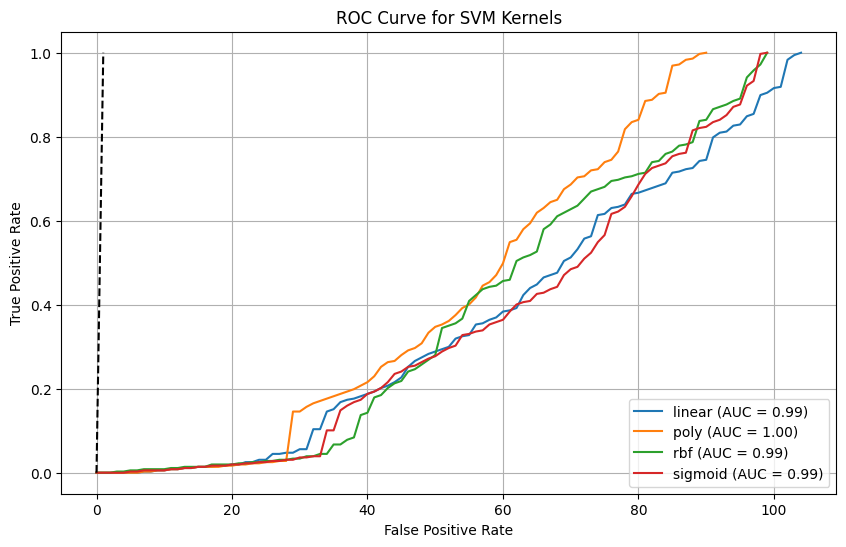

In [60]:
# plotting
plt.figure(figsize=(10,6))
for kernel in kernels:
  fpr,tpr,_ = roc_curve(y_test,res[kernel]['y_prob'])
  roc_auc = auc(fpr,tpr)

  plt.plot(fpr,label= f"{kernel} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM Kernels")
plt.legend()
plt.grid()
plt.show()
